## Assignment Credit Scoring
### Survival Analysis
#### Marie Reine Obama
#### May 2021

### 1. Introduction

In this project, the objective is to perform a survival analysis with the use of a datasets containing information about the mortage.

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import lifelines

In [6]:
# load dataset
mortgage = pd.read_csv("mortgage.csv")

In [7]:
mortgage.head(10)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
5,1,30,-7,25,113,40127.97,25.318291,9.2,212.73,2.274218,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
6,1,31,-7,25,113,39718.66,26.566117,9.2,200.67,1.850689,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
7,1,32,-7,25,113,35877.03,25.872559,9.2,186.12,1.104163,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
8,1,33,-7,25,113,34410.03,25.584425,9.2,180.52,0.836859,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
9,1,34,-7,25,113,33590.47,26.008073,9.2,173.35,-0.314448,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [14]:
mortgage.isna().sum()

id                           0
time                         0
orig_time                    0
first_time                   0
mat_time                     0
balance_time                 0
LTV_time                   270
interest_rate_time           0
hpi_time                     0
gdp_time                     0
uer_time                     0
REtype_CO_orig_time          0
REtype_PU_orig_time          0
REtype_SF_orig_time          0
investor_orig_time           0
balance_orig_time            0
FICO_orig_time               0
LTV_orig_time                0
Interest_Rate_orig_time      0
hpi_orig_time                0
default_time                 0
payoff_time                  0
status_time                  0
dtype: int64

# Preprocessing & EDA

In [17]:
import missingno as msno

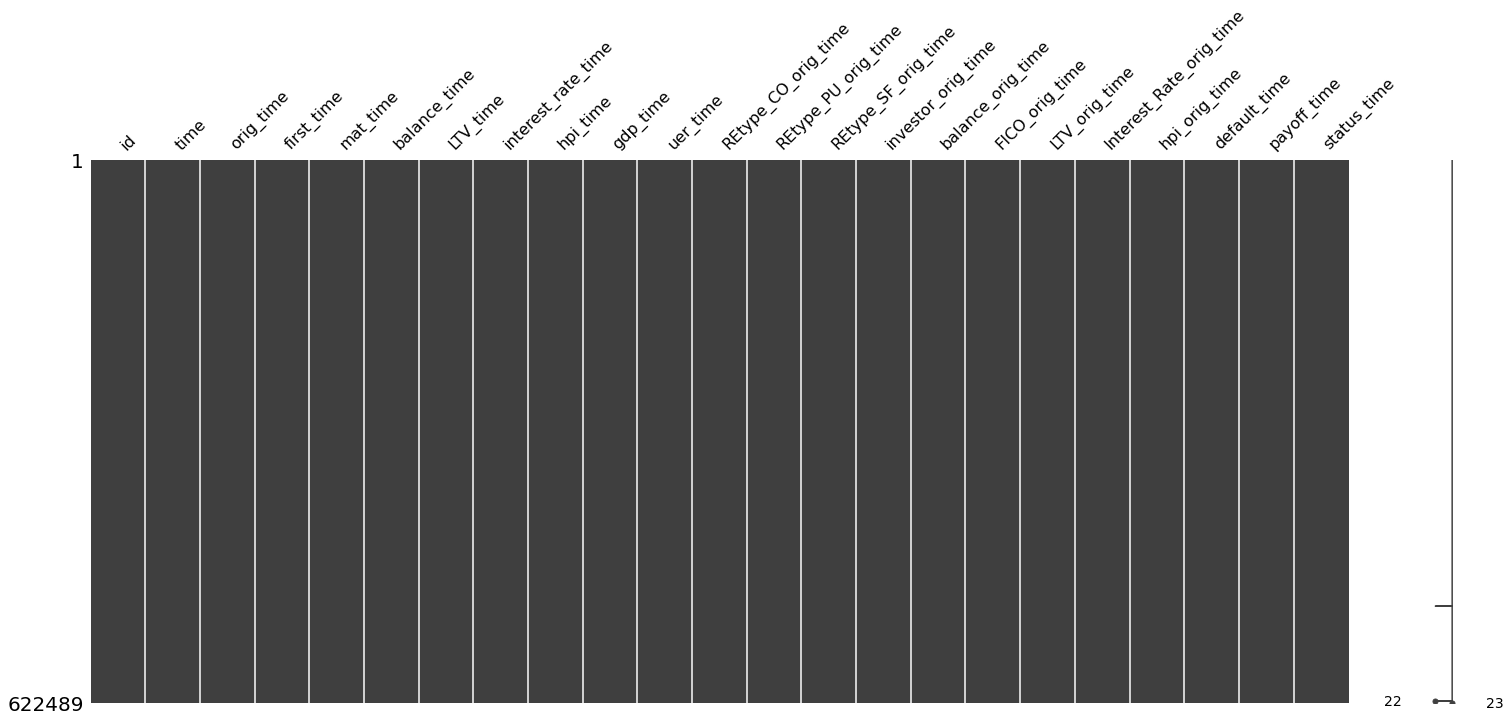

In [18]:
# missing values - accept
msno.matrix(mortgage)

In [19]:
mortgage['LTV_time'].describe()

count    622219.000000
mean         83.078239
std          24.968839
min           0.000000
25%          67.109446
50%          82.253269
75%         100.634381
max         803.513550
Name: LTV_time, dtype: float64

THE DATA IS VERY IMBALANCED

In [11]:
mortgage.default_time.value_counts()

0    607331
1     15158
Name: default_time, dtype: int64

REPLACE MISSING VALUES EIRH

In [15]:
mortgage.LTV_time.value_counts()

80.000000    1347
82.410889     538
83.282882     486
83.632774     470
82.844919     465
             ... 
52.536516       1
90.353387       1
29.816102       1
72.855434       1
61.643447       1
Name: LTV_time, Length: 567800, dtype: int64

In [22]:
mortgage['LTV_time'].fillna(-999, inplace = True)

In [24]:
mortgage['LTV_time'].isna().sum()

0

ALL VARIABLES ARE NUMERIC

In [26]:
mortgage.dtypes

id                           int64
time                         int64
orig_time                    int64
first_time                   int64
mat_time                     int64
balance_time               float64
LTV_time                   float64
interest_rate_time         float64
hpi_time                   float64
gdp_time                   float64
uer_time                   float64
REtype_CO_orig_time          int64
REtype_PU_orig_time          int64
REtype_SF_orig_time          int64
investor_orig_time           int64
balance_orig_time          float64
FICO_orig_time               int64
LTV_orig_time              float64
Interest_Rate_orig_time    float64
hpi_orig_time              float64
default_time                 int64
payoff_time                  int64
status_time                  int64
dtype: object

In [30]:
mortgage.shape

(622489, 23)

In [31]:
mortgage.describe()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
count,622489.000000,622489.000000,622489.000000,622489.000000,622489.000000,6.224890e+05,622489.000000,622489.000000,622489.00000,622489.000000,...,622489.000000,622489.000000,6.224890e+05,622489.000000,622489.000000,622489.000000,622489.000000,622489.000000,622489.000000,622489.000000
mean,25147.492561,35.800806,20.570057,24.607362,137.206527,2.459649e+05,82.608896,6.702451,184.10245,1.381032,...,0.612067,0.138226,2.562539e+05,673.616922,78.975460,5.649546,198.115217,0.024351,0.042714,0.109779
std,13750.200051,11.579971,7.615170,6.739015,19.532501,2.141563e+05,33.627657,2.079246,27.65077,1.964645,...,0.487280,0.345137,2.197181e+05,71.724558,10.127052,2.978061,33.964785,0.154135,0.202212,0.427967
min,1.000000,1.000000,-40.000000,1.000000,18.000000,0.000000e+00,-999.000000,0.000000,107.83000,-4.146711,...,0.000000,0.000000,0.000000e+00,400.000000,50.100000,0.000000,75.710000,0.000000,0.000000,0.000000
25%,13580.000000,27.000000,18.000000,21.000000,137.000000,1.020174e+05,67.085419,5.650000,158.60000,1.104163,...,0.000000,0.000000,1.080000e+05,626.000000,75.000000,5.000000,179.450000,0.000000,0.000000,0.000000
50%,24881.000000,34.000000,22.000000,25.000000,142.000000,1.806183e+05,82.240987,6.625000,180.52000,1.850689,...,1.000000,0.000000,1.880000e+05,678.000000,80.000000,6.290000,216.770000,0.000000,0.000000,0.000000
75%,37045.000000,44.000000,25.000000,28.000000,145.000000,3.374950e+05,100.623817,7.875000,212.73000,2.694111,...,1.000000,0.000000,3.520000e+05,729.000000,80.000000,7.456000,222.390000,0.000000,0.000000,0.000000
max,50000.000000,60.000000,60.000000,60.000000,229.000000,8.701859e+06,803.513550,37.500000,226.29000,5.132464,...,1.000000,1.000000,8.000000e+06,840.000000,218.500000,19.750000,226.290000,1.000000,1.000000,2.000000


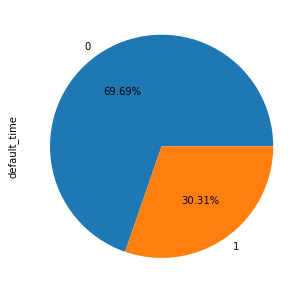

In [33]:
# display number of defaults
mortgage.groupby("id").agg({"default_time":np.max})["default_time"].value_counts().plot.pie(autopct='%.2f%%', figsize=(5,8))

To apply the KaplanMeier model we need to ensure that the data is static and not episodic, therefore we convert the data as shown below

In [34]:
# convert episodic data to static
mortgage_static = mortgage.groupby("id").agg(np.max).reset_index()

In [35]:
mortgage_static.head(10)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,48,-7,25,113,41303.42,28.963629,9.200,226.29,3.029499,...,1,0,45000.0,715,69.4,9.200,87.03,1,0,1
1,2,26,18,25,138,105826.38,65.469851,7.680,226.29,2.899137,...,1,0,107200.0,558,80.0,7.680,186.91,0,1,2
2,3,29,-6,25,114,44866.18,31.459735,11.375,226.29,2.899137,...,1,0,48600.0,680,83.6,8.750,89.58,0,1,2
3,4,60,-2,25,119,61031.10,49.156858,11.000,226.29,3.029499,...,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
4,5,27,18,25,138,52295.07,66.346343,9.155,226.29,2.899137,...,1,0,52800.0,527,80.0,9.155,186.91,0,1,2
5,6,56,19,25,139,209058.33,97.386340,10.625,226.29,3.029499,...,1,0,212000.0,670,80.0,6.600,191.42,1,0,1
6,7,26,18,25,138,108122.31,77.919574,9.000,226.29,2.899137,...,1,0,109250.0,601,95.0,9.000,186.91,0,1,2
7,8,25,18,25,138,152393.21,58.819187,7.250,226.29,2.899137,...,1,0,192600.0,663,90.0,7.250,186.91,0,1,2
8,9,37,18,25,138,131533.24,100.454778,11.000,226.29,2.899137,...,1,0,128000.0,501,80.0,8.730,186.91,1,0,1
9,10,29,18,25,139,88819.74,67.296390,10.230,226.29,2.899137,...,1,0,90000.0,665,80.0,7.230,186.91,1,0,1


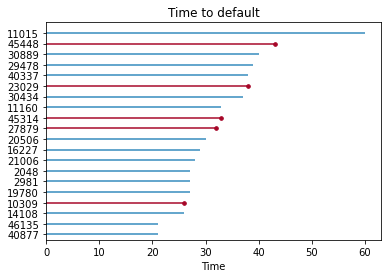

In [37]:
from lifelines.plotting import plot_lifetimes

df_samp = mortgage_static.sample(20)
ax = plot_lifetimes(df_samp["time"], event_observed=df_samp["default_time"])
ax.set_xlabel("Time")
ax.set_title("Time to default")
plt.show()

The above chart shows a random sample of 20 users and the time they take to pay their loans. From the chart we see that most of the customers are right censored, only after 20 months do we begin to see an effect

# Kaplan-Meier Estimator

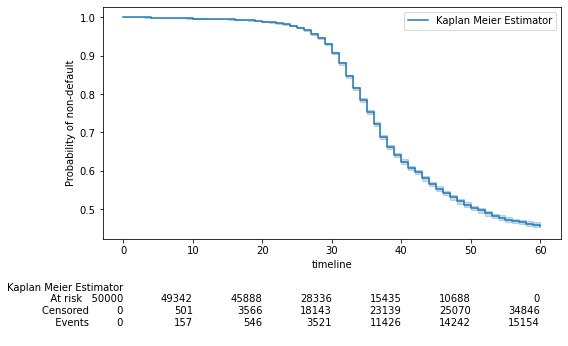

In [39]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
# fit on static data: TIME indicates the last observed timestep, mortgage_static indicates whether the customer defaulted
kmf.fit(mortgage_static['time'], mortgage_static['default_time'], label='Kaplan Meier Estimator')

# plot survival function
ax = kmf.plot_survival_function(at_risk_counts=True,figsize=(8,5))
ax.set_ylabel('Probability of non-default')
plt.show()

The above plot shows that the probability of non-default stops from time step 30, and time step 35, we have a survival rate of 80%. 

The prpobabily of default starts increasing beyond time step 30,

35.0


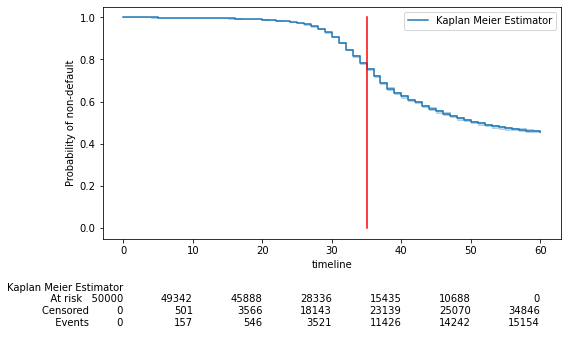

In [42]:
# Median default_time?
median_default = mortgage_static.query("default_time==1")["time"].median()
print(median_default)

# add to plot
ax = kmf.plot_survival_function(at_risk_counts=True,figsize=(8,5))
ax.set_ylabel('Probability of non-default')
plt.plot([median_default, median_default], [0,1], 'k-', c="red")
plt.show()

This chart shows that there is an approximately 80% chance of surviving after 35 months, with no likely survival beyond the 60th month. The redline indicates that after 35 months, 50% of the total defaulters have defaulted.

In [43]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,50000,50000
1.0,22,3,19,0,50000
2.0,37,5,32,0,49978
3.0,57,14,43,0,49941
4.0,56,25,31,0,49884
...,...,...,...,...,...
56.0,223,58,165,0,8996
57.0,231,49,182,0,8773
58.0,245,77,168,0,8542


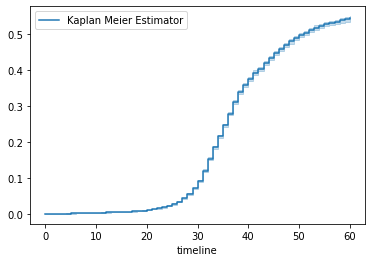

In [71]:
# plot cumulative hazard function
kmf.plot_cumulative_density()

This is a flipped version of the previous chart, it shows time to default for the defaulters

# Compare multiple groups

In [56]:
# checking groups at least 2 unique values
mortgage.nunique()[mortgage.nunique() <=3 ]

REtype_CO_orig_time    2
REtype_PU_orig_time    2
REtype_SF_orig_time    2
investor_orig_time     2
default_time           2
payoff_time            2
status_time            3
dtype: int64

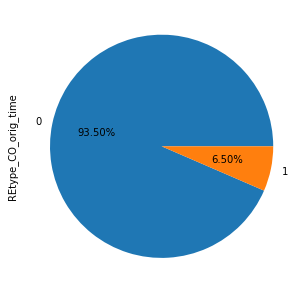

In [59]:
# display pie chart REtype_CO_orig_time
mortgage_static["REtype_CO_orig_time"].value_counts().plot.pie(autopct='%.2f%%', figsize=(5,8))

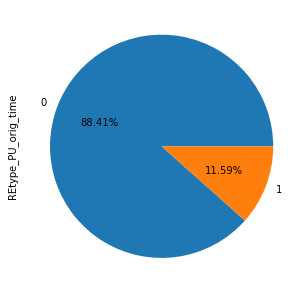

In [58]:
# display pie chart REtype_PU_orig_time
mortgage_static["REtype_PU_orig_time"].value_counts().plot.pie(autopct='%.2f%%', figsize=(5,8))

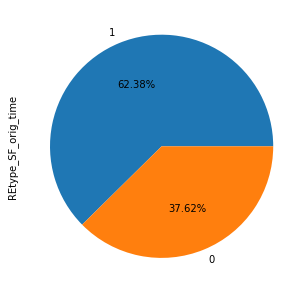

In [60]:
# display pie chart REtype_SF_orig_time
mortgage_static["REtype_SF_orig_time"].value_counts().plot.pie(autopct='%.2f%%', figsize=(5,8))

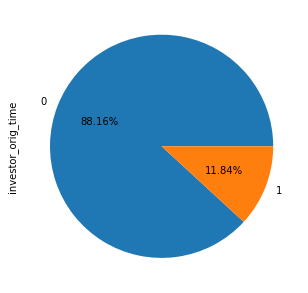

In [61]:
# display pie chart investor_orig_time
mortgage_static["investor_orig_time"].value_counts().plot.pie(autopct='%.2f%%', figsize=(5,8))

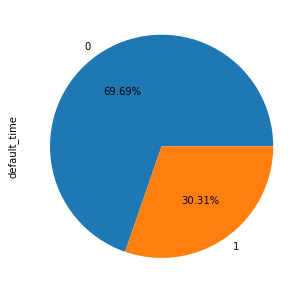

In [62]:
# display pie chart default_time
mortgage_static["default_time"].value_counts().plot.pie(autopct='%.2f%%', figsize=(5,8))

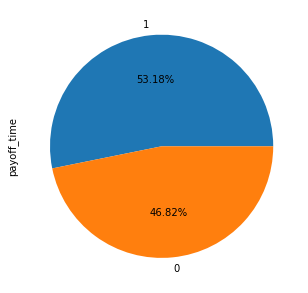

In [63]:
# display pie chart payoff_time
mortgage_static["payoff_time"].value_counts().plot.pie(autopct='%.2f%%', figsize=(5,8))

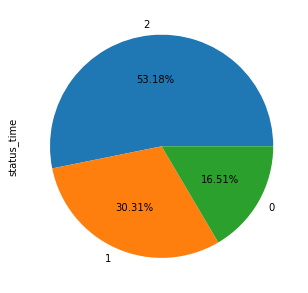

In [64]:
# display pie chart status_time
mortgage_static["status_time"].value_counts().plot.pie(autopct='%.2f%%', figsize=(5,8))

In [98]:
mortgage_static["balance_orig_time"]

0         45000.0
1        107200.0
2         48600.0
3         63750.0
4         52800.0
           ...   
49995     82000.0
49996    331417.0
49997    166250.0
49998    345000.0
49999    664000.0
Name: balance_orig_time, Length: 50000, dtype: float64

## REQUIREMENTS

1. Evaluate whether the time to default for borrowers with low outstanding balance at origination time (30% quantile) significantly differs from borrowers with Average/High outstanding balance at origination time.

2. Display and compare the probability of survival after 25 and 50 months for the two groups

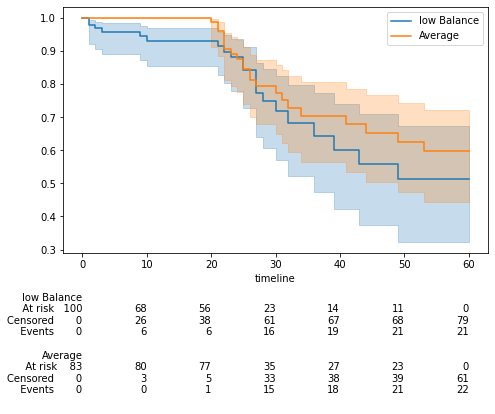

In [106]:
# Compare two groups

kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

fig, ax = plt.subplots(1,1 , figsize=(7,6))

# subset data
df1 = mortgage_static.loc[mortgage_static["orig_time"] == 1,:]
df2 = mortgage_static.loc[mortgage_static["orig_time"] == 0,:]

# fit subset orig_time = low balance
ax = kmf1.fit(df1['time'], df1['default_time'], label='low Balance').plot_survival_function(ax=ax)

# fit subset orig_time = average
ax = kmf2.fit(df2['time'], df2['default_time'], label='Average').plot_survival_function(ax=ax)

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf1, kmf2, ax=ax)
plt.tight_layout()

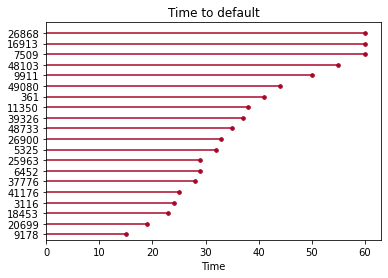

In [118]:
from lifelines.plotting import plot_lifetimes

df_samp = mortgage_static.sample(20)
ax = plot_lifetimes(df_samp["time"], event_observed=df_samp["balance_orig_time"])
ax.set_xlabel("Time")
ax.set_title("Time to default")
plt.show()

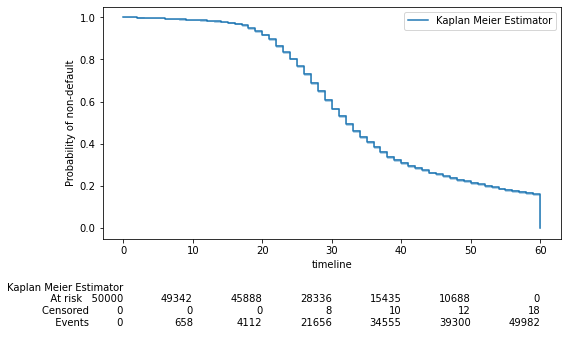

In [114]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
# fit on static data: TIME indicates the last observed timestep, mortgage_static indicates whether the customer defaulted
kmf.fit(mortgage_static['time'], mortgage_static['balance_orig_time'], label='Kaplan Meier Estimator')

# plot survival function
ax = kmf.plot_survival_function(at_risk_counts=True,figsize=(8,5))
ax.set_ylabel('Probability of non-default')
plt.show()

1. The time to default for the people with low outstanding balance, that is at the 30% quartile at time stamp 20 is not much different from the average at time stamp 30


2. After 25 months, about 80% of the total defaulters would have defaulted. After 50 months (25 months later), about 20% of the total defaulters would have defaulted. 

In [79]:
# Perform logrank test to assess whether there is a difference between Males and Females in time to default

from lifelines.statistics import logrank_test

# Null-Hypothesis: No difference between the two groups
res = logrank_test(df1['time'], df2['time'], event_observed_A=df1['default_time'],event_observed_B=df2['default_time'])

# We can reject the Null-Hypothesis (p < 0.05)
res.summary 

,test_statistic,p,-log2(p)
0,0.284755,0.593601,0.752433


# Cox Proportional Hazard Model - Time Varying

In [120]:
# select variables used in previous model + time varying variables
mortgage_tv = pd.merge(mortgage[["id","default_time", "hpi_time", "gdp_time", "uer_time", "balance_time",
"interest_rate_time", "FICO_orig_time", "LTV_time"]], mortgage_static[["id", "time"]]\
.rename(columns={"time":"time_end"}), on="id", how="inner") 

# Assumption: time always starts at 0 (no interval censored data)
mortgage_tv["first_time"] = 0

In [122]:
from lifelines import CoxTimeVaryingFitter

# Note: credit_tv contains both time varying and static variables 
ctv = CoxTimeVaryingFitter()
ctv.fit(mortgage_tv, id_col="id", event_col="default_time", start_col="first_time", stop_col="time_end", show_progress=True)
ctv.summary

Iteration 6: norm_delta = 0.00001, step_size = 1.00000, ll = -193558.13067, newton_decrement = 0.00000, seconds_since_start = 31.1Convergence completed after 6 iterations.


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
hpi_time,-7.768146e-03,0.992262,6.879178e-04,-9.116440e-03,-6.419852e-03,0.990925,0.993601,-11.292260,1.433033e-29,95.816843
gdp_time,-7.856186e-02,0.924445,4.220802e-03,-8.683447e-02,-7.028924e-02,0.916829,0.932124,-18.613018,2.520151e-77,254.454953
uer_time,-1.617126e-01,0.850686,8.070482e-03,-1.775305e-01,-1.458948e-01,0.837335,0.864249,-20.037542,2.592587e-89,294.277208
balance_time,5.799961e-07,1.000001,2.124173e-08,5.383631e-07,6.216291e-07,1.000001,1.000001,27.304566,3.743805e-164,542.891702
interest_rate_time,1.720388e-01,1.187724,3.438656e-03,1.652992e-01,1.787785e-01,1.179746,1.195756,50.030830,0.000000e+00,inf
FICO_orig_time,-4.462664e-03,0.995547,1.210542e-04,-4.699926e-03,-4.225402e-03,0.995311,0.995784,-36.865021,1.680521e-297,985.863735
LTV_time,8.150758e-03,1.008184,1.385841e-04,7.879138e-03,8.422378e-03,1.007910,1.008458,58.814516,0.000000e+00,inf


In [127]:
# inspect p-values
round(ctv.summary['p'], 100)

covariate
hpi_time              1.433033e-29
gdp_time              2.520151e-77
uer_time              2.592587e-89
balance_time          0.000000e+00
interest_rate_time    0.000000e+00
FICO_orig_time        0.000000e+00
LTV_time              0.000000e+00
Name: p, dtype: float64

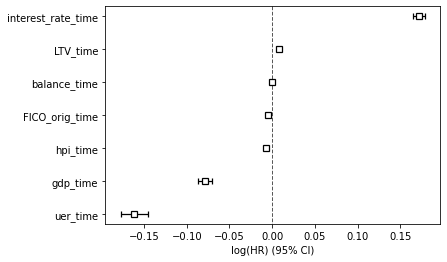

In [128]:
ctv.plot()

From the P values, we can see that the hpi_time, gdp_time, usr_time are highly relevant in our time varying model as factors which impacts time to default.

The variables listed with high p values increase the probability to default, all things being equal.